In [87]:
# from Helpers import *
import numpy as np
import matplotlib.pyplot as plt
import os
# os.chdir("C:/Users/Lanceiv/Documents/GEMS/report")

In [88]:
m = 10000
n = 100
SNR = 1000
TIs = [200, 350, 416, 450, 500, 650, 750, 832, 1000]
N_PLOTS = 3
N_PARAMS = 4

In [89]:
# USED TO GENERATE THE DATA, NO LONGER NEEDED

# datas = np.zeros((len(TIs), n, m, N_PARAMS))
# for i, TI in enumerate(TIs):
#     for j in range(n):
#         data = run_metro_2(TI, m, SNR, verbose = False)
#         datas[i, j] = data
        
# combined_datas = datas.reshape((len(TIs), n*m, N_PARAMS))

# data_1m = np.zeros((len(TIs), n*m, N_PARAMS))
# for i, TI in enumerate(TIs):
#     data_1m[i] = run_metro_2(TI, n*m, SNR, verbose = True)

# np.save("datas_pc_final.npy", datas)
# np.save("combined_datas_pc_final.npy", combined_datas)
# np.save("data_pc_1m_final.npy", data_1m)

100%|██████████| 550000/550000 [00:13<00:00, 42073.27it/s]


In [90]:
datas = np.load("datas_pc_final.npy")
combined_datas = np.load("combined_datas_pc_final.npy")
data_1m = np.load("data_pc_1m_final.npy")

In [91]:
def create_huge_figure(fileName = None, dpi = 100, upper_bound = 300):
    # len(TIs) by N_PLOTS + 1 subplots
    fig, axs = plt.subplots(len(TIs), N_PLOTS + 2, figsize = (15, 25))
    fig.subplots_adjust(hspace = 0.3)
    axs[0, N_PLOTS].set_title(f"m = 1,000,000", fontsize = 10)
    axs[0, N_PLOTS+1].set_title(f"n = {n}", fontsize = 10)
    for i in range(len(TIs)):
        plt.text(-0.5, 0.5, f"TI = {TIs[i]}", fontsize = 12, rotation = 90, ha = 'center', va = 'center', transform = axs[i, 0].transAxes)

        for j in range(N_PLOTS):
            data = datas[i, j]
            axs[i, j].scatter(data[:,2], data[:,3], s = 1, alpha = 0.1)

        # m = 1,000,000, n = 1
        axs[i, N_PLOTS].hist2d(data_1m[i][:,2], data_1m[i][:,3], bins = 1000, cmap = plt.cm.jet, norm = plt.cm.colors.LogNorm())


        # m = 10,000, n = 100
        axs[i, N_PLOTS+1].hist2d(combined_datas[i][:,2], combined_datas[i][:,3], bins = 500, cmap = plt.cm.jet, norm = plt.cm.colors.LogNorm())

        for j in range(N_PLOTS + 2):
            axs[i, j].set_xlabel(r"$T_{21}$")
            axs[i, j].set_ylabel(r"$T_{22}$")
            axs[i, j].set_xlim(0, upper_bound)
            axs[i, j].set_ylim(0, upper_bound)
            axs[i, j].set_aspect('equal')


    if fileName:
        plt.savefig(fileName, dpi = dpi)


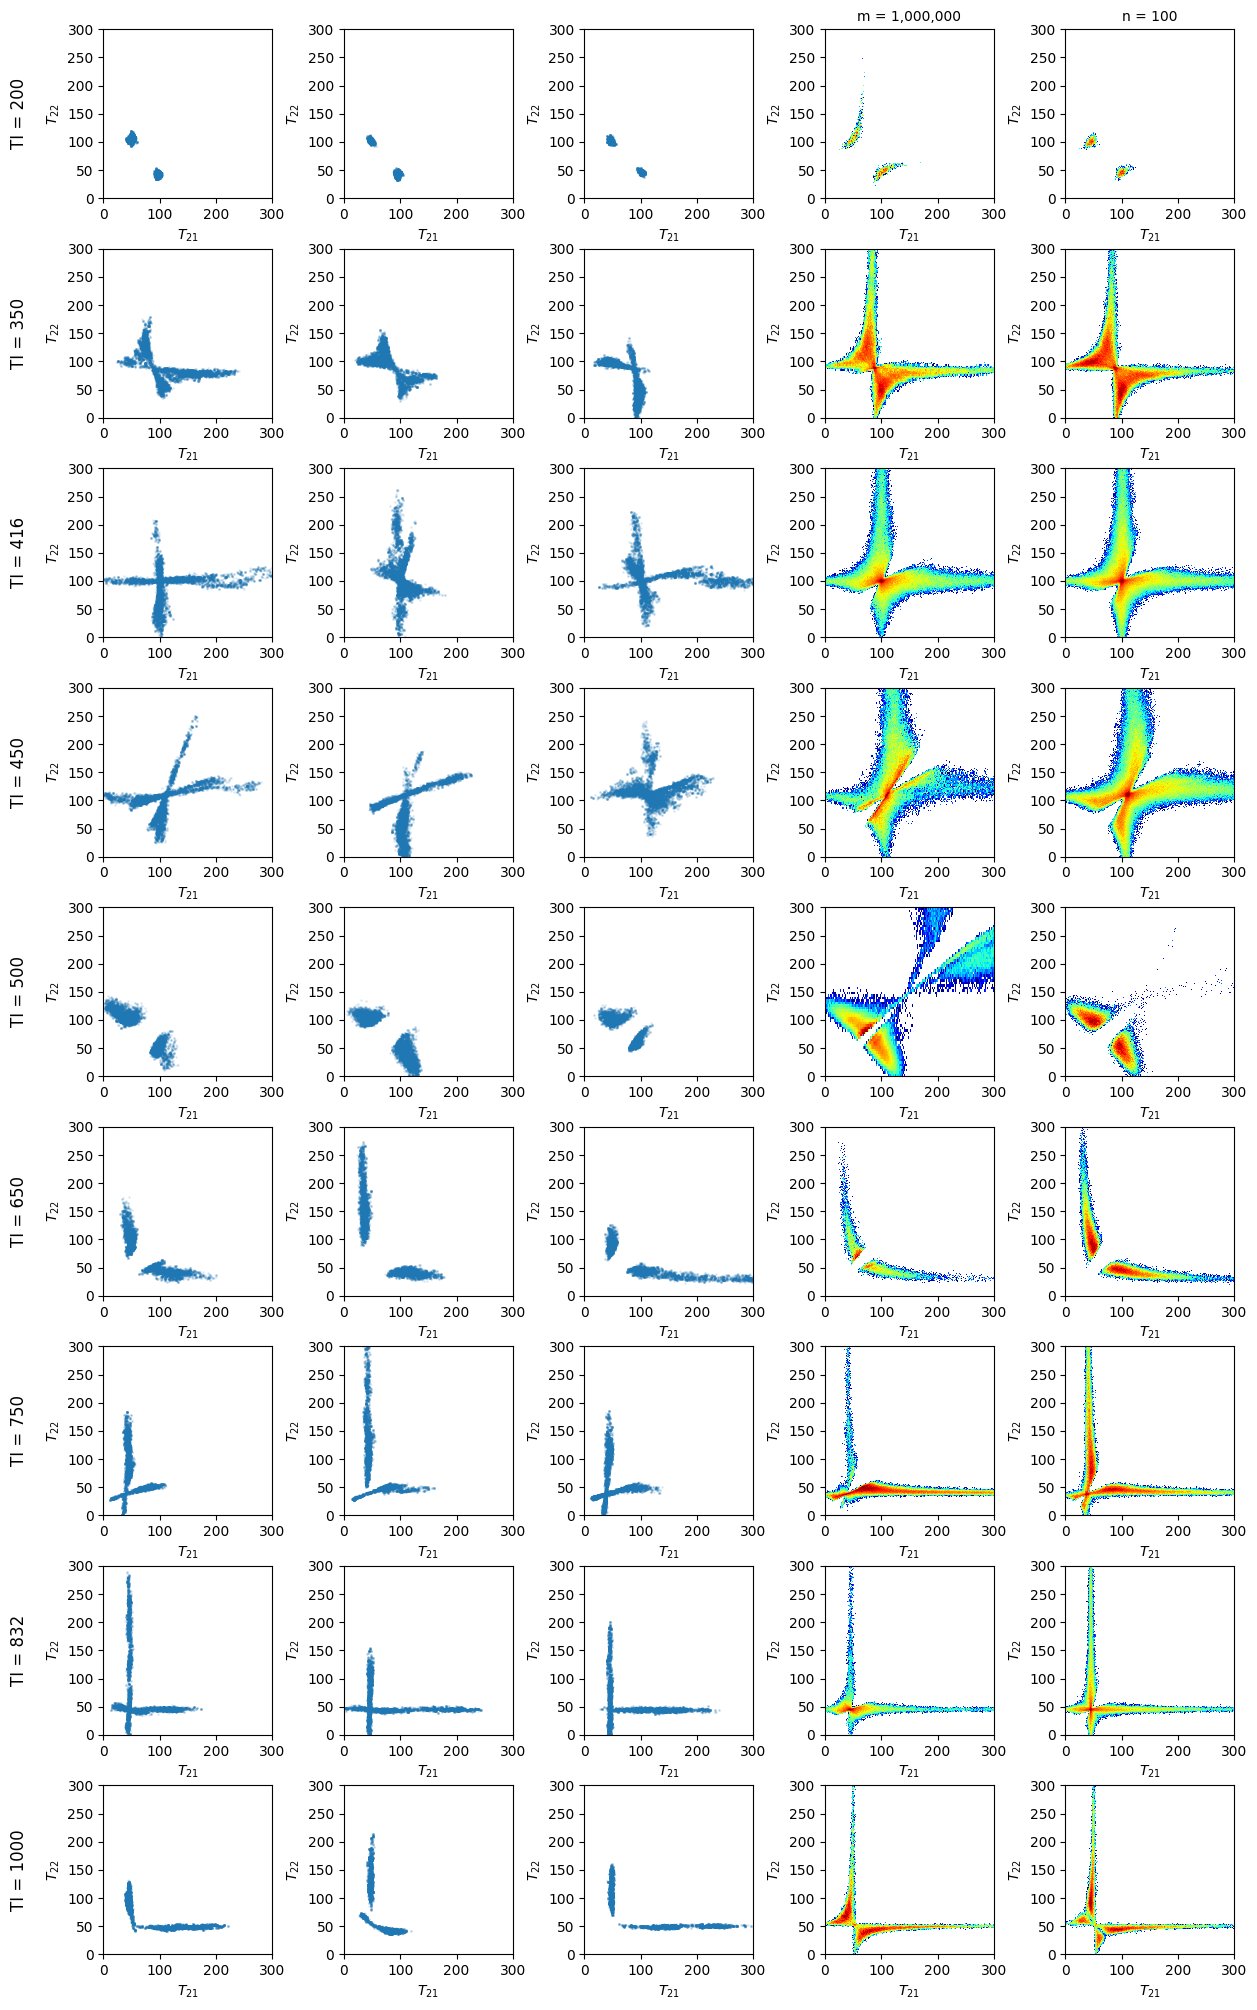

In [92]:
create_huge_figure()

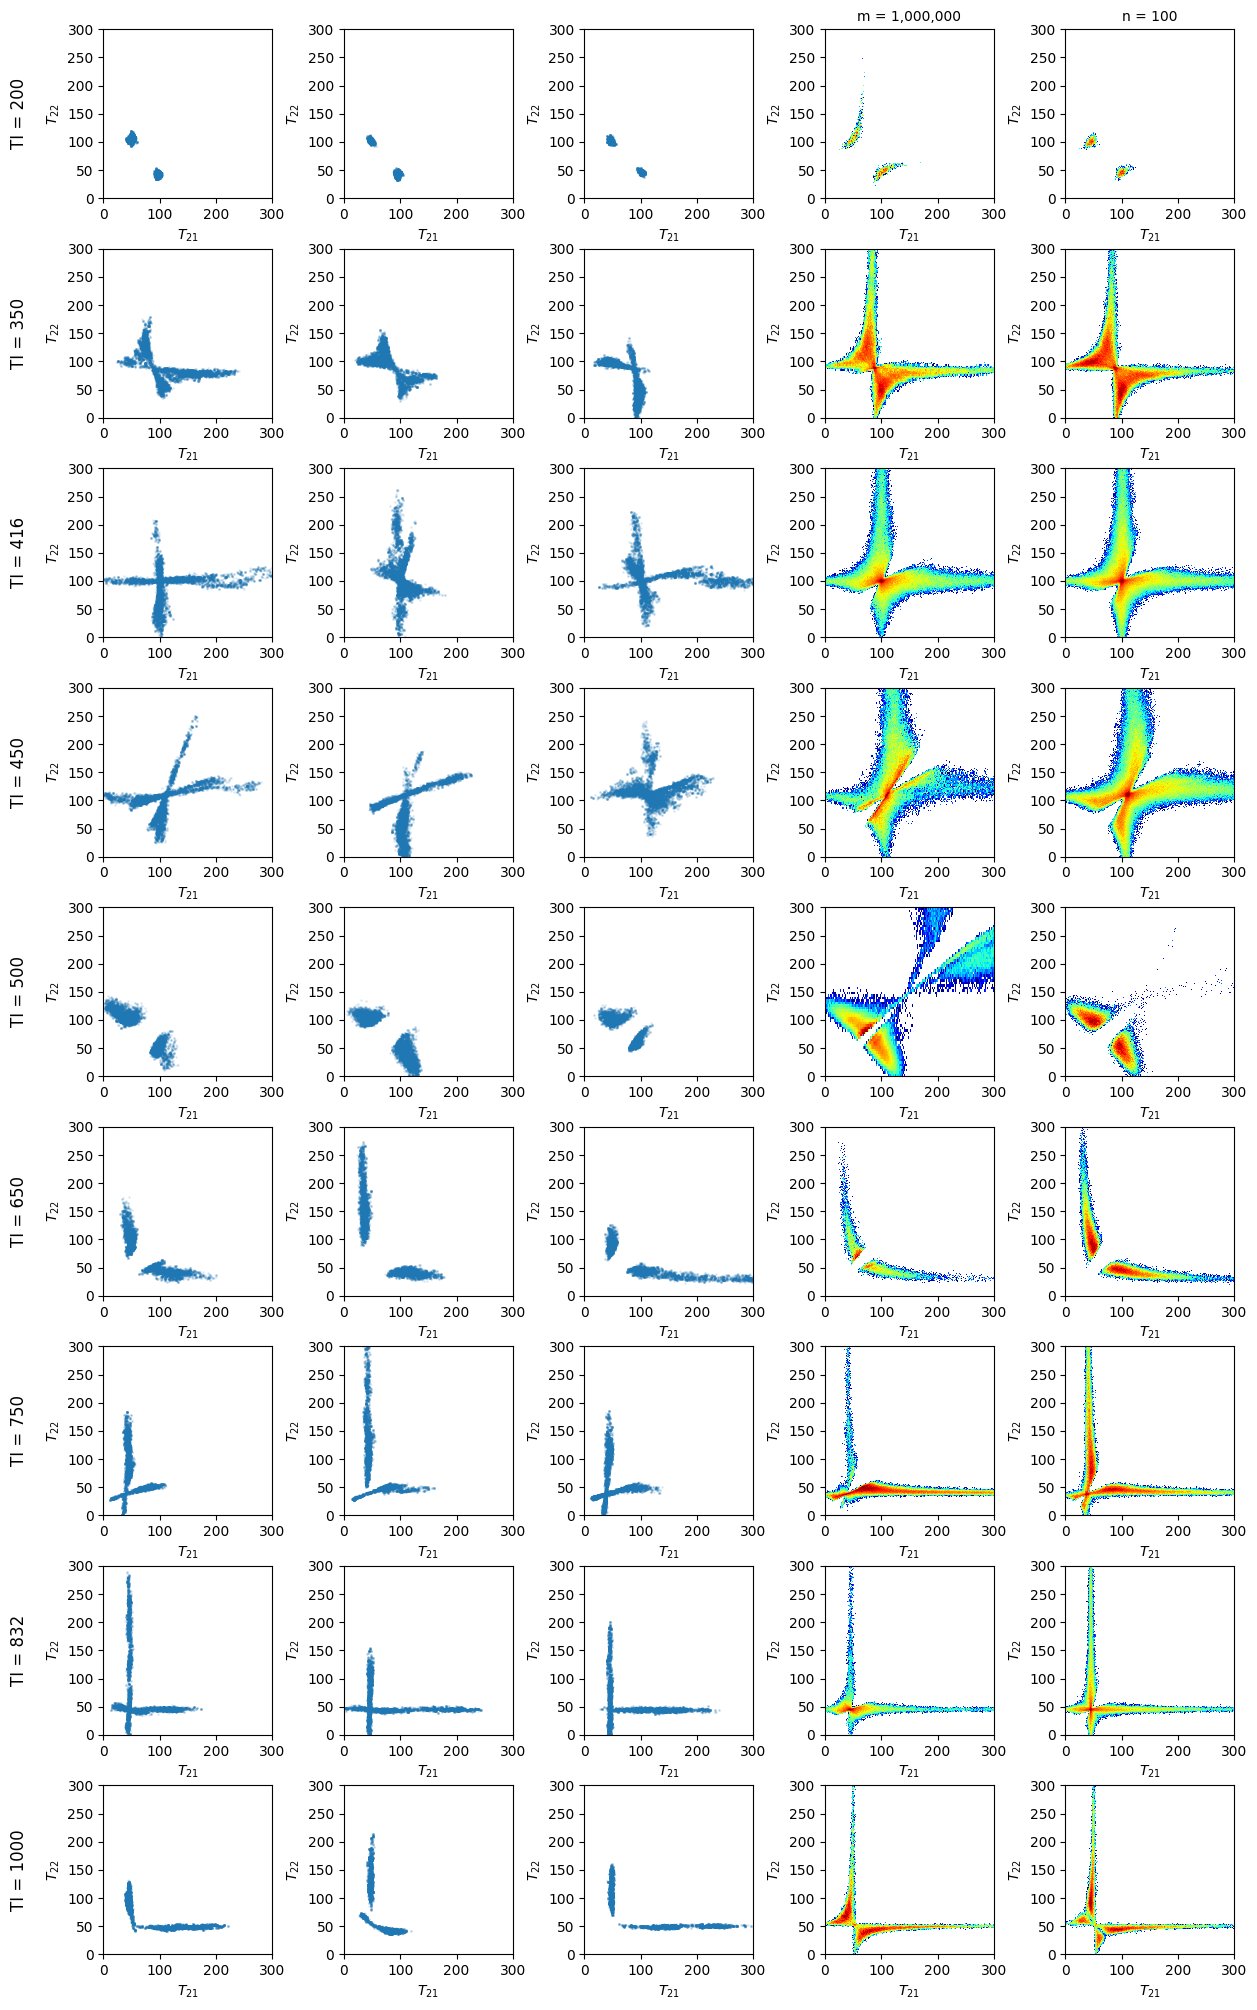

In [93]:
create_huge_figure("point_clouds_huge_figure_final.png", 2000)